# WINNING HORSE - Modelo de datos

In [13]:
# Lectura de información
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Otros
import itertools
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns

# DataScience
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB #Solo para numéricas
from sklearn.metrics import classification_report
from sklearn.multiclass import OneVsRestClassifier


## DataSet

In [14]:
df = pd.read_csv("../data/winning_horse_limpieza.csv");
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208326 entries, 0 to 208325
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Region                        208326 non-null  object 
 1   Distance                      208326 non-null  int64  
 2   Category                      204038 non-null  object 
 3   MajorEvent                    208326 non-null  float64
 4   GroundCondition               208326 non-null  float64
 5   Stick                         208326 non-null  float64
 6   HorseName                     208326 non-null  object 
 7   StartingStall                 208326 non-null  int64  
 8   Weight                        208326 non-null  int64  
 9   JockeyName                    208326 non-null  object 
 10  ChampionshipType              208326 non-null  object 
 11  OwnerName                     208326 non-null  object 
 12  TOP1                          208326 non-nul

### Correlaciones

Text(0.5, 1.0, 'Correlation Matrix')

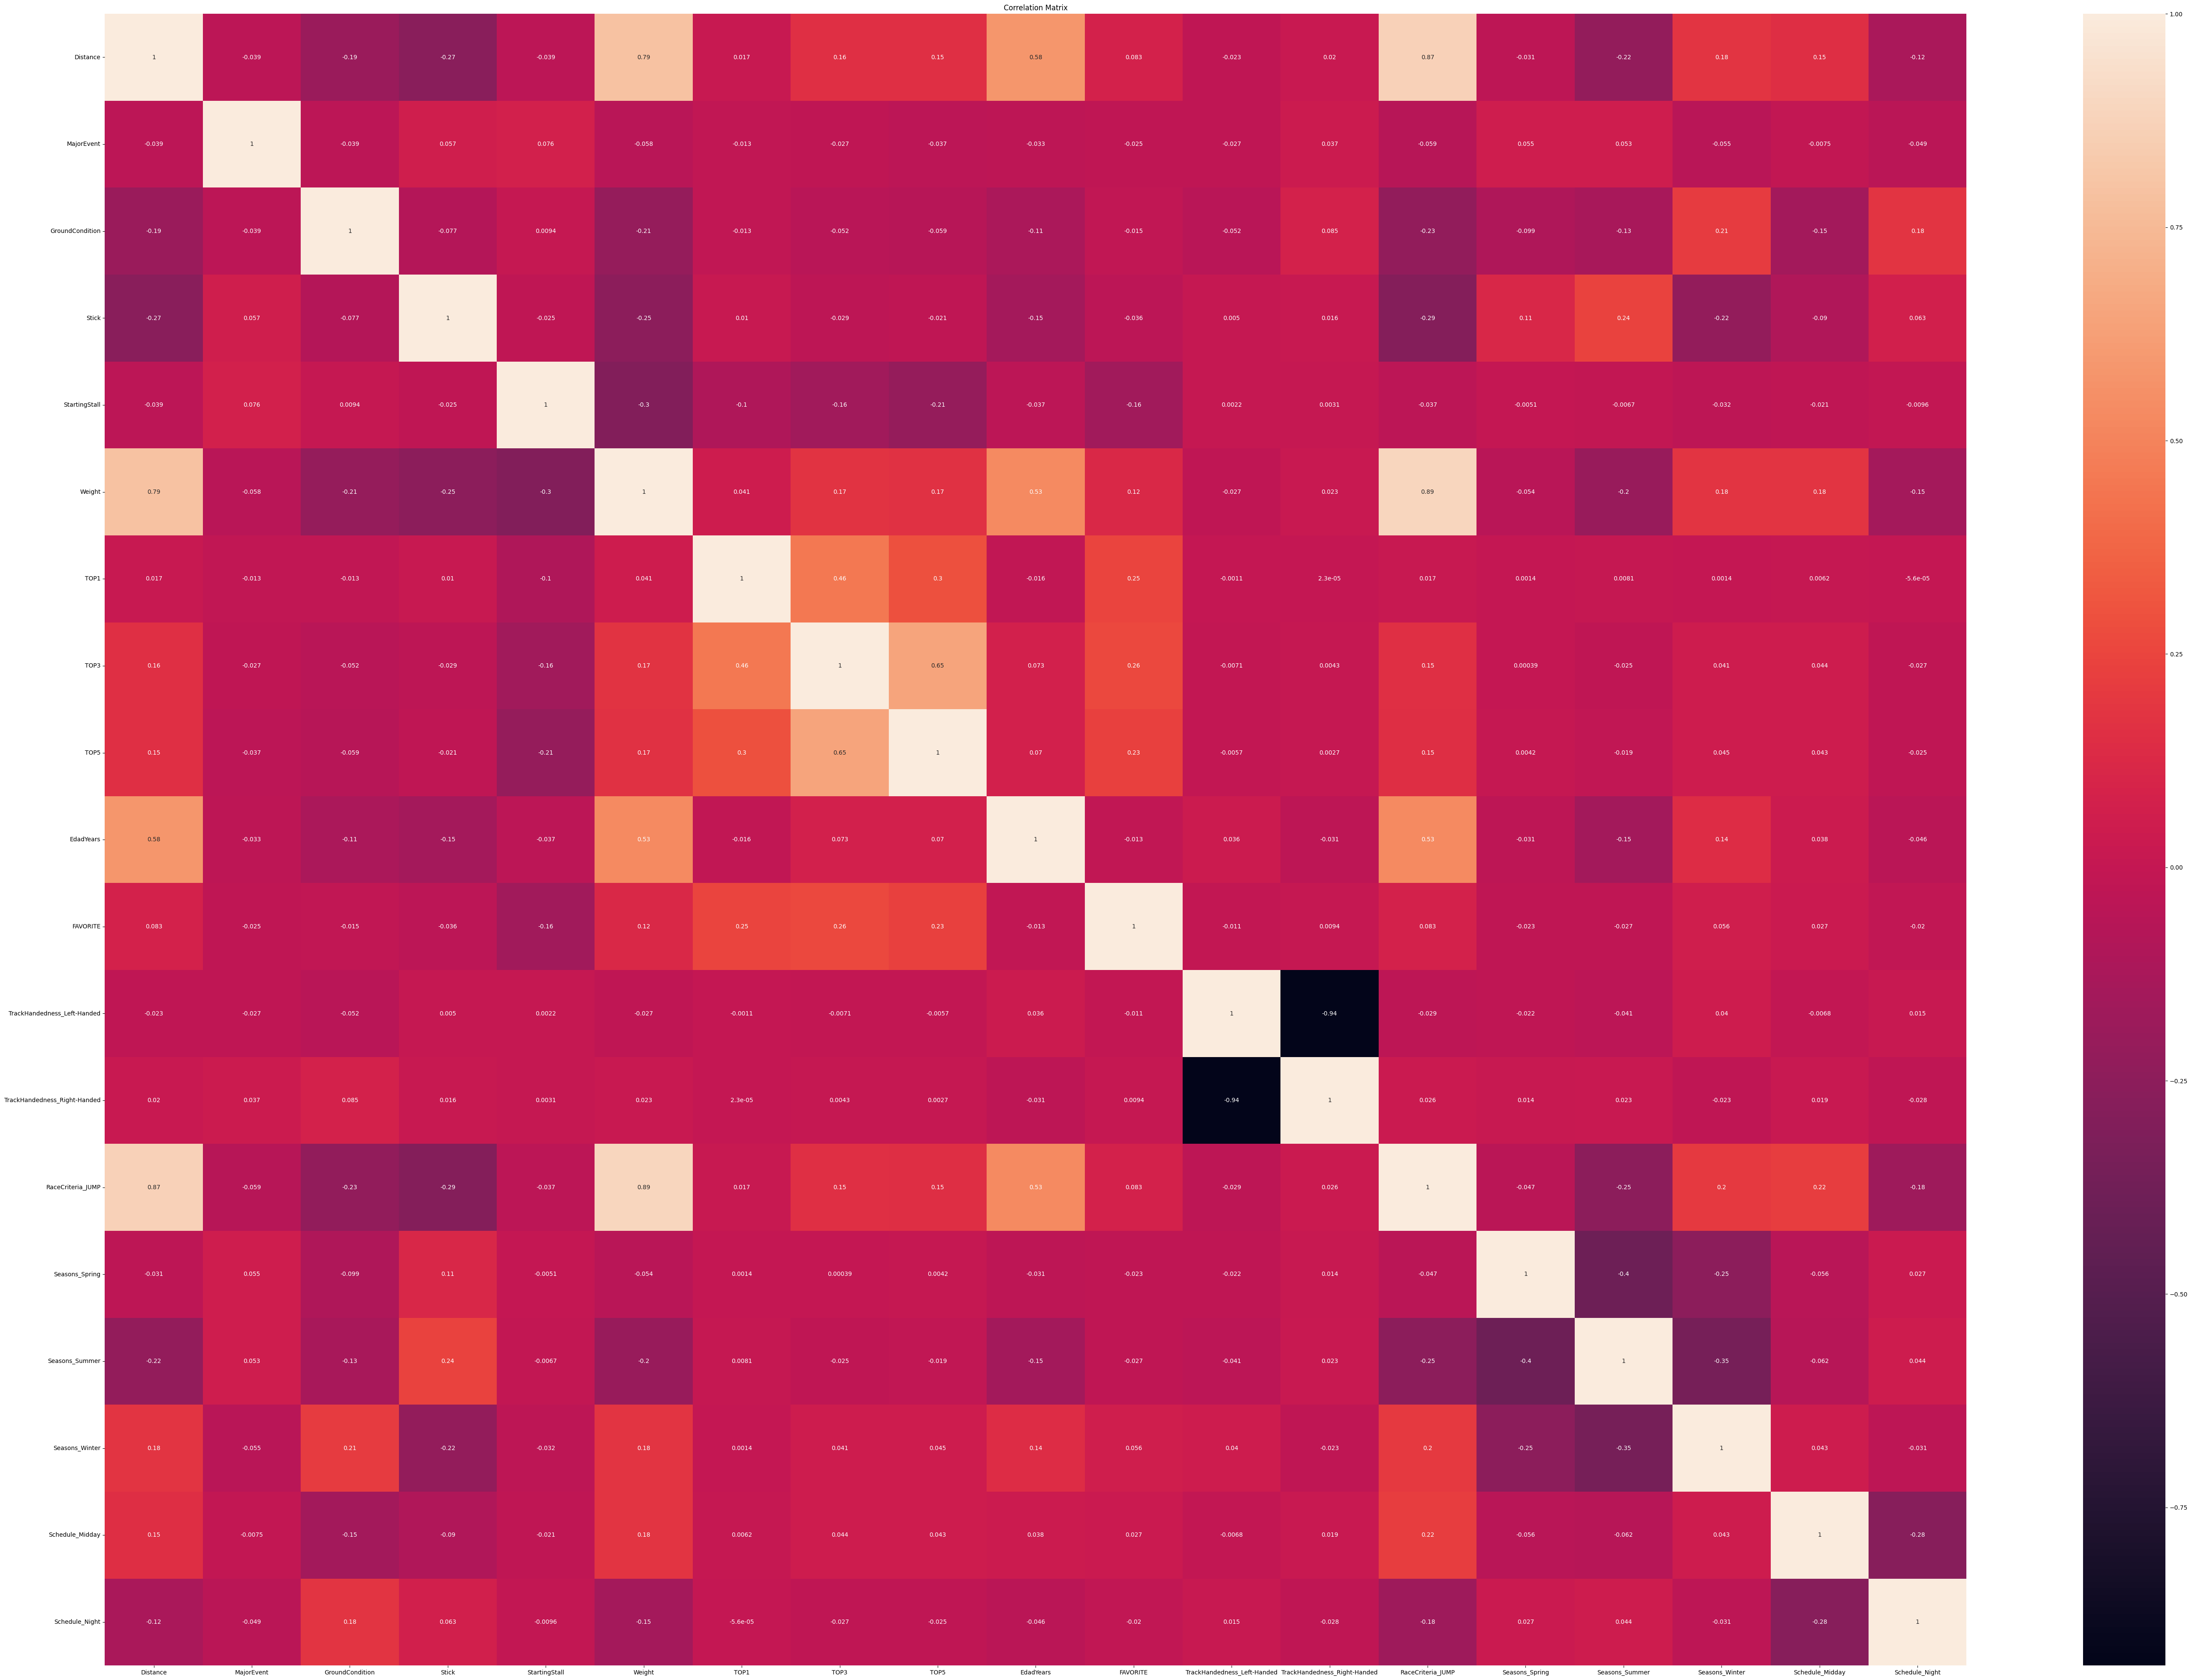

In [15]:
corr = df.corr(numeric_only=True)

# Pintemos las correlaciones
plt.figure(figsize=(70, 50))
sns.heatmap(corr, annot=True)
plt.title("Correlation Matrix")

## FASE DE ENTRENAMIENTO

In [16]:
#Naive Bayes Categorico necesita codificar todas las variables categóricas en Dummies
#Escoger entre df_Flat y df_Jump
muestra = pd.get_dummies(df)

#Eliminamos todos los dataframes utilizados hasta ahora para liberar espacio
#del (df, df_Flat, df_Jump, dummies)

#Extraemos las variables dependientes y las independientes
X = muestra.drop(["TOP1", "TOP3", "TOP5"], axis = 1)
y_top1 = muestra["TOP1"]
y_top3 = muestra["TOP3"]
y_top5 = muestra["TOP5"]

y_multi = muestra[["TOP1","TOP3","TOP5"]]

#Eliminamos el dataframe original para ahorrar espacio
del (muestra)

Separación del dataframe en Train y Test (80/20 manteniendo distribución)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y_top1, test_size=0.2, random_state=0, stratify=y_top1)

Generación de un modelo Bayesiano

In [18]:
Gnb=GaussianNB()

Entrenamiento del modelo

In [ ]:
Gnb.fit(X_train, y_train)

## FASE DE EVALUACIÓN

### Evaluación Clase única (depuración)

In [ ]:
y_pred=Gnb.predict(X_test)
print(classification_report(y_test,y_pred))

### Evaluación Multiclase

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_multi, test_size=0.2, random_state=0, stratify=y_multi)
ovr_clf=OneVsRestClassifier(GaussianNB()).fit(X_train,y_train)
ovr_clf.predict_proba(X_test)
y_pred_multi = ovr_clf.predict(X_test)
print(classification_report(y_test,y_pred_multi))